Code: 

In [1]:
from keras.datasets import mnist 
from keras.layers import Input, Dense 
from keras.models import Model 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255

In [4]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:])) 
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:])) 
print(X_train.shape) 
print(X_test.shape) 
input_img= Input(shape=(784,)) 
encoded = Dense(units=32, activation='relu')(input_img) 
decoded = Dense(units=784, activation='sigmoid')(encoded) 
autoencoder=Model(input_img, decoded) 
encoder = Model(input_img, encoded) 
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=
['accuracy']) 
autoencoder.fit(X_train, X_train, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(X_test, X_test)) 
encoded_imgs = encoder.predict(X_test) 
predicted = autoencoder.predict(X_test)

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0011 - loss: 0.6931 - val_accuracy: 0.0011 - val_loss: 0.6930
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0015 - loss: 0.6929 - val_accuracy: 0.0011 - val_loss: 0.6928
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0010 - loss: 0.6927 - val_accuracy: 0.0011 - val_loss: 0.6926
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0013 - loss: 0.6925 - val_accuracy: 0.0011 - val_loss: 0.6925
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0011 - loss: 0.6923 - val_accuracy: 0.0011 - val_loss: 0.6923
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0014 - loss: 0.6921 - val_accuracy: 0.0011 - val_loss: 0.6921
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0011 - loss: 0.6920 - val_accuracy: 9.0000e-04 - val_loss: 0.6919
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 9.6704e-04

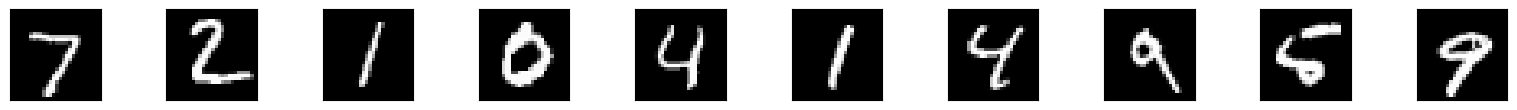

In [5]:
plt.figure(figsize=(40, 4)) 
for i in range(10): 
    # display original 
    ax = plt.subplot(3, 20, i + 1) 
    plt.imshow(X_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

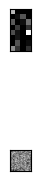

In [7]:
# display encoded image 
ax = plt.subplot(3, 20, i + 1 + 20) 
plt.imshow(encoded_imgs[i].reshape(8,4)) 
plt.gray() 
ax.get_xaxis().set_visible(False) 
ax.get_yaxis().set_visible(False) 
# display reconstruction 
ax = plt.subplot(3, 20, 2*20 +i+ 1) 
plt.imshow(predicted[i].reshape(28, 28)) 
plt.gray() 
ax.get_xaxis().set_visible(False) 
ax.get_yaxis().set_visible(False)

In [8]:
plt.show()